<a href="https://colab.research.google.com/github/dwiiittt/Tugas-Pengolahan-Citra-Digital/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCD_Assignment02

Dwi Gusna

## 1. Convolution Function

Memulai proses konvolusi ...
Proses konvolusi selesai.


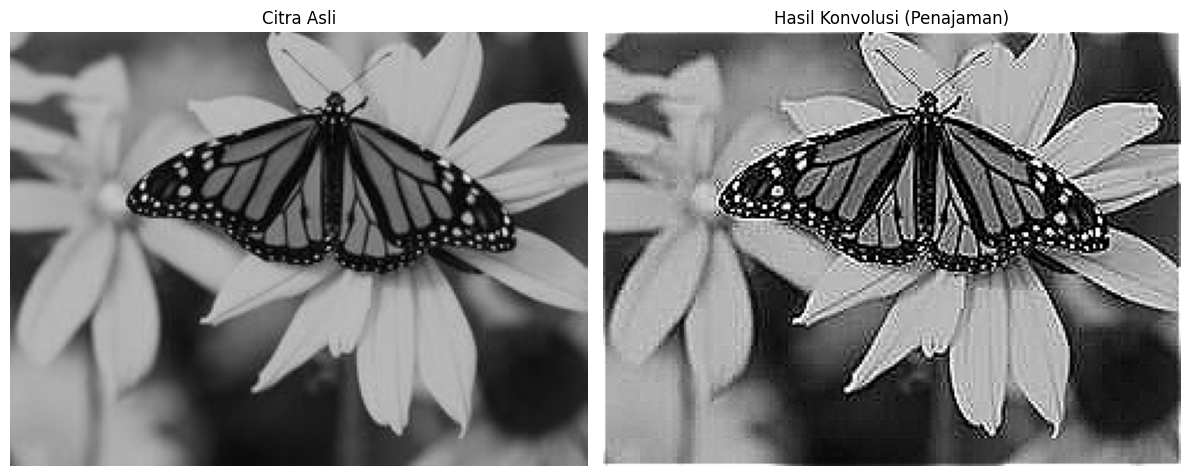

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def konvolusi(image, kernel):

    # Mengambil dimensi dari citra dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung ukuran padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Membuat citra baru dengan padding nol (menggunakan bantuan NumPy untuk ini)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Inisialisasi citra keluaran
    output_image = np.zeros_like(image, dtype='float32')


    # Melakukan iterasi pada setiap piksel di citra asli
    for y in range(image_height):
        for x in range(image_width):
            # Mengekstrak bagian citra  yang tumpang tindih dengan kernel
            vp = padded_image[y : y + kernel_height, x : x + kernel_width]

            # Melakukan perkalian elemen-demi-elemen antara pixel dan kernel
            # lalu menjumlahkan semua hasilnya untuk mendapatkan satu nilai piksel.
            output_pixel = np.sum(vp * kernel)

            # Menyimpan hasil perhitungan ke citra keluaran
            output_image[y, x] = output_pixel

    return output_image

# --- Langkah 1: Memuat Gambar ---

# Ganti 'nama_file_anda.jpg' dengan nama file gambar Anda
img = cv2.imread('/content/citra1.jpg', cv2.IMREAD_GRAYSCALE)
# Jika file tidak ditemukan, akan memunculkan error


# --- Langkah 2: Definisikan Kernel ---
kernel_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

# --- Langkah 3: Panggil Fungsi Konvolusi ---
print("Memulai proses konvolusi ...")
sharpened_image = konvolusi(img, kernel_sharpen)
print("Proses konvolusi selesai.")

# --- Langkah 4: Menampilkan Hasil Menggunakan Library ---
plt.figure(figsize=(12, 6))

# Tampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Citra Asli")
plt.axis('off')

# Tampilkan citra hasil konvolusi
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray', vmin=0, vmax=255)
plt.title("Hasil Konvolusi (Penajaman)")
plt.axis('off')

plt.tight_layout()
plt.show()

## 2. Spatial Filtering with several kernel and discuss in which image case the kernel is suitable for

Memuat citra ...
Citra berhasil dimuat.
Tahap 1: Gaussian Blur ...
Tahap 2: Sobel Filtering ...


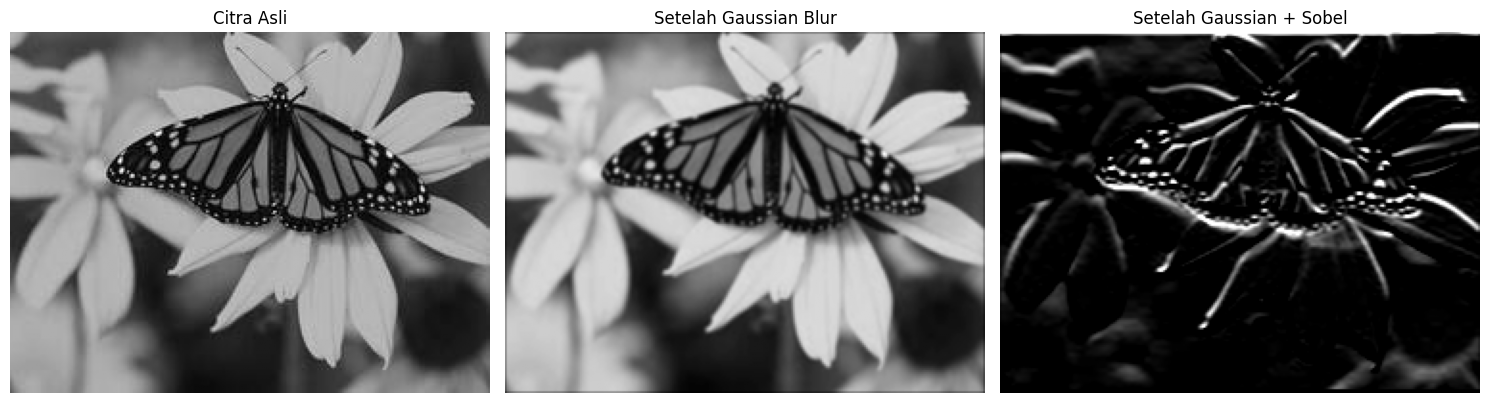

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def konvolusi(image, kernel):

    # Mengambil dimensi dari citra dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung ukuran padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Membuat citra baru dengan padding nol (menggunakan bantuan NumPy untuk ini)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Inisialisasi citra keluaran
    output_image = np.zeros_like(image, dtype='float32')


    # Melakukan iterasi pada setiap piksel di citra asli
    for y in range(image_height):
        for x in range(image_width):
            # Mengekstrak bagian citra  yang tumpang tindih dengan kernel
            vp = padded_image[y : y + kernel_height, x : x + kernel_width]

            # Melakukan perkalian elemen-demi-elemen antara pixel dan kernel
            # lalu menjumlahkan semua hasilnya untuk mendapatkan satu nilai piksel.
            output_pixel = np.sum(vp * kernel)

            # Menyimpan hasil perhitungan ke citra keluaran
            output_image[y, x] = output_pixel

    return output_image


# --- Langkah 1: Memuat Gambar ---
print("Memuat citra ...")
img = cv2.imread('/content/citra1.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("File tidak ditemukan, pastikan path benar!")
print("Citra berhasil dimuat.")


# --- Langkah 2: Definisikan Kernel ---
gaussian_kernel = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype='float32')

sobel_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype='float32')


# --- Langkah 3: Proses Filtering ---
print("Tahap 1: Gaussian Blur ...")
smoothed_image = konvolusi(img, gaussian_kernel)

print("Tahap 2: Sobel Filtering ...")
sobel_filtered = konvolusi(smoothed_image, sobel_kernel)


# --- Langkah 4: Normalisasi hasil ke rentang 0-255 ---
smoothed_image = np.clip(smoothed_image, 0, 255).astype(np.uint8)
sobel_filtered = np.clip(sobel_filtered, 0, 255).astype(np.uint8)


# --- Langkah 5: Menampilkan Hasil ---
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title("Setelah Gaussian Blur")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_filtered, cmap='gray')
plt.title("Setelah Gaussian + Sobel")
plt.axis('off')

plt.tight_layout()
plt.show()


Kode ini menggunakan dua kernel untuk memproses citra. Pertama, kernel Gaussian blur berukuran 3×3
```
gaussian_kernel = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1])
```

berfungsi meratakan intensitas piksel, menghaluskan citra, dan mengurangi noise. Setelah itu, citra hasil smoothing diproses dengan kernel Sobel horizontal berukuran 3×3


```
sobel_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
]
```


, yang mendeteksi perubahan intensitas dalam arah vertikal sehingga garis atau tepi horizontal terlihat jelas. Kombinasi ini menjadikan deteksi tepi lebih efektif karena Gaussian menekan gangguan, sementara Sobel menonjolkan struktur tepi utama.

## 3. Sharpening with blurring operation

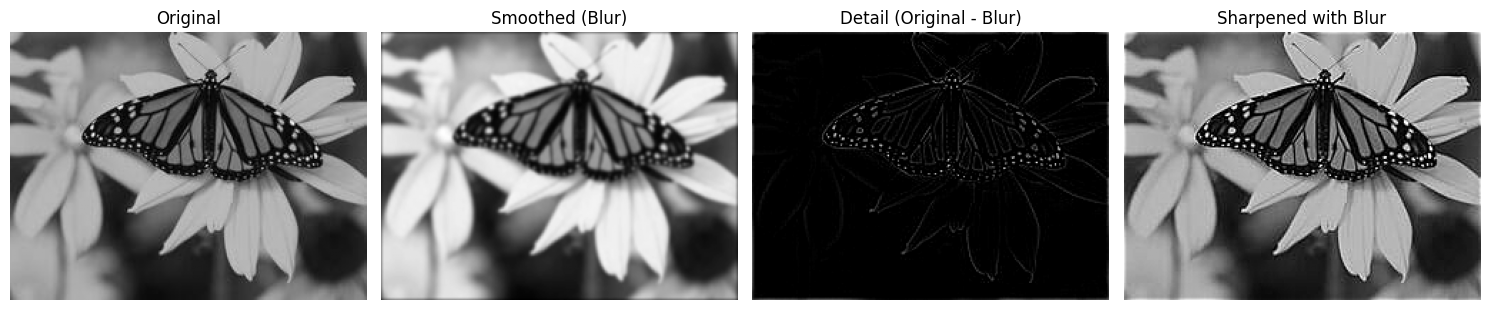

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def konvolusi(image, kernel):

    # Mengambil dimensi dari citra dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung ukuran padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Membuat citra baru dengan padding nol (menggunakan bantuan NumPy untuk ini)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Inisialisasi citra keluaran
    output_image = np.zeros_like(image, dtype='float32')


    # Melakukan iterasi pada setiap piksel di citra asli
    for y in range(image_height):
        for x in range(image_width):
            # Mengekstrak bagian citra  yang tumpang tindih dengan kernel
            vp = padded_image[y : y + kernel_height, x : x + kernel_width]

            # Melakukan perkalian elemen-demi-elemen antara pixel dan kernel
            # lalu menjumlahkan semua hasilnya untuk mendapatkan satu nilai piksel.
            output_pixel = np.sum(vp * kernel)

            # Menyimpan hasil perhitungan ke citra keluaran
            output_image[y, x] = output_pixel

    return output_image


# --- Langkah 1: Memuat gambar ---
img = cv2.imread('/content/citra1.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("File tidak ditemukan!")

# --- Langkah 2: kernel blur (Gaussian 5x5) ---
gaussian_kernel = (1/273) * np.array([
    [1,  4,  7,  4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1,  4,  7,  4, 1]
], dtype='float32')

# --- Langkah 3: Buat citra blur ---
blurred = konvolusi(img, gaussian_kernel)

# --- Langkah 4: Hitung detail ---
detail = img.astype(np.float32) - blurred

# --- Langkah 5: Tambahkan detail dengan faktor alpha ---
alpha = 1.0  # bisa diganti 0.5, 1.5, dll sesuai kebutuhan
sharpened = img.astype(np.float32) + alpha * detail

# Normalisasi hasil
blurred = np.clip(blurred, 0, 255).astype(np.uint8)
detail = np.clip(detail, 0, 255).astype(np.uint8)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

# --- Langkah 6: Tampilkan hasil ---
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Smoothed (Blur)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(detail, cmap='gray')
plt.title("Detail (Original - Blur)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened with Blur")
plt.axis("off")

plt.tight_layout()
plt.show()


## 4. Make discussion in the end of COLAB, in which case the filtering should be used instead of pixel-based method.

Metode filtering berbasis konvolusi sebaiknya digunakan ketika kita ingin memproses citra dengan mempertimbangkan hubungan antar piksel tetangga, bukan hanya nilai piksel tunggal. Contoh kasusnya adalah blurring, sharpening, edge detection, dan noise reduction, di mana informasi sekitar piksel sangat memengaruhi hasil. Filtering mampu menonjolkan detail atau pola tertentu (misalnya tepi) yang tidak bisa didapat hanya dengan operasi piksel per piksel.